In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim
@pyimport matplotlib.patches as patches

In [2]:
using Base64
function showanim(filename)
    base64_video = base64encode(open(filename))
    display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
end

showanim (generic function with 1 method)

In [3]:
mutable struct World
    objects
    debug
    ani
end

World() = World([], false, nothing)
World(debug) = World([], debug, nothing)

function append(self::World, obj)
    push!(self.objects, obj)
end

function init_draw(self::World, ax)
    ax.set_aspect("equal")
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xlabel("X", fontsize=20)
    ax.set_ylabel("Y", fontsize=20)
end

function draw(self::World)
    fig, ax = subplots()
    init_draw(self, ax)    
    elems = []

    if self.debug
        for i = 1:1000
            one_step(self, i, elems, ax)
        end
    else
        self.ani = anim.FuncAnimation(fig, one_step, fargs=(self, elems, ax), frames=10, interval=1000)
        self.ani[:save]("test.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
    end 
    
end

function one_step(i,self::World,elems, ax)
    plt.cla()
    init_draw(self, ax)
    while length(elems) > 0
        pop!(elems)
    end
    vcat(elems, ax.text(-4.4, 4.5, "t = $i", fontsize=10))
    for obj in self.objects
        draw(obj, ax, elems)
    end
end

one_step (generic function with 1 method)

In [4]:
mutable struct IdealRobot
    pose
    r
    color
end

IdealRobot(pose) = IdealRobot(pose, 0.2, "black")
IdealRobot(pose, color) = IdealRobot(pose, 0.2, color)

function draw(self::IdealRobot, ax, elems)
    x,y,theta = self.pose
    xn = x + self.r * cos(theta)
    yn = y + self.r * sin(theta)
    elems = vcat(elems, ax.plot([x, xn], [y,yn], color = self.color))
    c = patches.Circle(xy=(x,y), radius = self.r, fill = false, color = self.color)
    elems = vcat(elems, [ax.add_patch(c)])
end

draw (generic function with 2 methods)

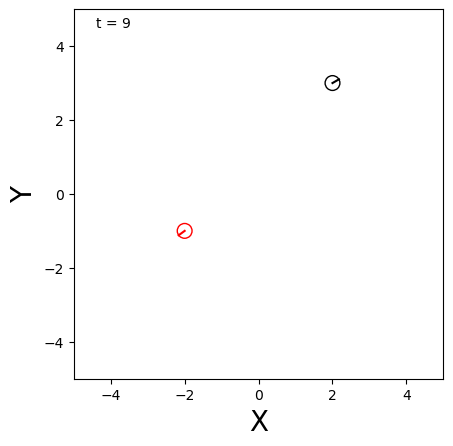

In [5]:
world = World(false)
robot1 = IdealRobot([2, 3, pi/6])
robot2 = IdealRobot([-2, -1, pi/5 * 6], "red")
append(world, robot1)
append(world, robot2)
draw(world)

In [6]:
showanim("test.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAEqdtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTggLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADFBliIQAF//+99S3zLLtU2+2C6j3op4mX0N1JQGblsTtOoAAAAMAAAMAAB68FzgCX4kK868AAAMAyoAXqEn/CmOPiASefdwlV7OOckzXd26jK6wIErr1WQUBXEvp/DSgNQ97tXAs3/wekXyhX1Mb3ZVyfbq8+p1Apq3KNqaxF53N7e9IBwscYTCBmhxrPfdPnMTlFUoqbrQLsVjz2QFqcc1+UagSfMYue9aCoGMemARaP4uwcgsJa9rgaZKzShGysAQrdkPwThQp6U3dpC9sG3k8/mWu0ib5iZMqrL9GF/3ipwxj8VzU09yqyNSUAkacoiCYmYdZuvBT/JN/EDolE2NCwCCMAKBK04LCXzetehEdlDmWF4CYRj1vkpF9vXugG+2r6aM3iGhdJKXrBuwcBF5nqavI+2YluEbLW41RMIz4fZnCN9cQ6IovzbWKeAmN2v1xsmWPin++si2nhvnw1/XuynX7Fu9OK4AAL7JFuDkxO4uXWdspyx6aZNAZl6wCtd521+XbRq+d6QoG/PoilDknR7Rh/ih2BDsQ4WYeS6iZw0GbKXbIM41QubYP/jbGRJkn59QGplYIUJFIY49Iod7uXY2hV8i9+EC+9OiTQGrBhsdKKW5633+gOxA7ZJlY6WLNkrqVrh/uFnnuQtZddw55Y3cE3nmxgNJC/EKu7ErdqyfMDnV9Q+Yl0xyGeIBiJPNHrds/1RcntCiNi/NouQMH5VfFKuAElFA/5G/dVbz9Dk/bmQ9qBzc7yA6iKgbUkBTXsd/yD5k7InBvY/lh0HNiGS0NhYShM9TTFOsK6Fuwm/s+kThRusRC/CTU49uqPE1s8v7o6wa7GgAACnabjnAx8i6sZQGCsUSK1Hty599hRWN5IR6GJA0T5/26VtSrkUrAbP0qHyVKL70QkZwZYQDUm+qTrT++4WL6/MhVY/4RuV3LtTM/3BC9wa45aafYeKgoBWFYpQzpD/Q+uPHc9srzCcaSSCVZU7l//04tgMqLyGTbnWhJvOQ1TWepcHvp2e+TbGJLwf3nfTJGX3y6BM0Ba2vS0KLoV4PrE0kOtvPgIE86VtMgdlkmxiIHdLLSvg18lkO8ob9zUkCbxdGJC2BIQvDAK0bR6NE2rpU1W8gLIOYGWbGVwdqRyNNuqUU2ZS5gJ7W/s3yZjAOmeqjsdi/HWPQ+JaCUz7m0V9u4BosonVbysy6DVsGWaYTEjJURU7mERK1hpGB5BafxmjfFxkA8hpA/IMCbEBRBETBfyLN6j/M48YCyC7FnTBI4pZyLWZxvlgICLlbRI+jqYHbrd76xltedHDqXz6tLH3vW68mRjPixuQOGchmWoZk0JyPXKAqTQFNBbxSX/rXp2Fnf/PyqA9FWklT/2qcI7obsJUuYNhh/BvsuuKPnj5ZuLn3RIkKmwvf71aDPLjcYrrV2Z4781LTJUOHTtk7HWaZTB5GL0MYnMvIvoxRwB5Ap+AHeiNXUL0hW+vLTBflI8boiinFt/J2zR7RAM1oAdVl72Ivqylkon8GPXf89Hd+aC9iVrHJpmV+fTulJRCKsX/r8x+DNLQi7xBCc9v6kqEIJuCeknvgF/THmCJJEw0uf8lBBhi/e/hTr3qMuKCxg8WF1WQ2UB0ayqlDLmMk5us1XLfZyyZdoGpCie0MDhfEh++stXza8QtNjnOXbQOH5Et9M9pkv70v7EN24/vnCLZu5foK17jwOIvauvBv8xO7/XwV29/5RX5U3hiAG5KzZ5HqBT82u7GS0pC/H22D0KiqC5lnI2fFIrsXoK0+k5d5hp0xR+diF5gjowL6nb55V8Ypik8LFFUYO+hnUQbZlzh7/CFtfuIvoqAoA/n4BWCxT7Fycs8TMLUWGYPVyHfdN+EXjvWln+d0HpR2dfykOEmnvBdI138n6MxkX1nSm/Gicr0ot6JFB5MCzrl1tvScC7Sim1rydScqF3tebbJPRNF+XtsuIIwX4XfhJ/7AAPeP0r//+A8/eerQyQeAG15j/lnlzY58PsJ8bN4ONzZoOHQg4y1TGEfDJPPbX9JMtLDYQdrWzcfp6Mylr6xGZhcSPE4dn51voIdDCq8mrrzZubnqpeA6PpWtlzVBVNNO3CVjB2HObyUiJ08jaymN2VorazBqja0AF8oVmBKTZoAhfz9tkxyy8qk/fFjXb3+y+gwuH/Ujh61xDDMxtooP4tz/TTzIx2kFmtgEspyyRWhhW+W9MSCbmKkHKGt21h48XMtoJUPFO2/i+ICwwO3g8SJZj6hJxBmRABox8ZnxFDqIGGnq7kwVRhDIjkfhYLR4mn48LSfoD3d4YP7BY19mefHj6cqj6nVu/i0WA+3X+mL8+dlBiyYGbuf5Ih2z5JMhi/acnR90nFaYS0Ky3WKE7kR3y/TNxwGA+IKtIJtUJu00xWjQ6oxheVXImoxoDeeOiYREB+Lua3qmYtm5yOQqQ5bWa+D4rHdK6hwmQ6VoomlYgBvhi+SP4A3lE5Ds6YSm0+Pkdp74gqyjRC19pgegzfZvzedDQNiBcRtrFK84gLRCdpu3DbdLOQMFxHSdP834DOiQ3DGVHlAV5RNn4AAADAAADAKmbHn0d+IjI7rPOn4xWNcV/flaPHRO8b9BJPUf4ZEvRiPCkvF0C9ZTZL1B0BfIx7hmAUCurWahR6LmHWzF4geOFX7fbinH7rSujezZv+xHn7/LHFpS+2oEvnhMqc6/qkBddXKzDe9QafkfjsUrN67Fi3Ez0r1gDnCkmqaSBV/edUdrTAzp+puGcSXcxQD6A9PziG58IrCV7kzglgXinn/ohPJXUMo6AACswrUUSq9fN/YhthdPxbrVTIkCWeXGlVsBlj77RRnQFCzu3/8Y0X4huppm3ef7HZh0ZWtjXfjL0nUuaAeR2iBHk687TSlpDztTtC3ZaYrvPoha3cEP5WKgrvQ1S/QsjQerj7egNfDLvCXv9g/5R8dpdYt2q0kez5nVGJAWCtu2bj5mKkXzj4LFz3VW